In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

1.	Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
path = r'C:\Users\honoc\Documents\CareerFoundry Folder\Python Fundamentals for Data Analysts\Exercise 4.3 Folder'
path
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Prepared data', 'instacart_merged.pkl'))

In [3]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,Gender,State,Age,date_joined,number_of_dependants,marital_status,customer_income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


2.	Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# Review columns like 'first_name,' and 'last_name' to identify PII, and Mask or Remove them if necessary.
ords_prods_merge.drop(columns = ['first_name', 'last_name'], inplace=True)

In [5]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_flag,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,marital_status,customer_income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,NaN,NaN,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low spender,Non-frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,NaN,NaN,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,NaN,NaN,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,...,NaN,NaN,Male,Minnesota,81,8/1/2019,1,married,49620,both


3.	The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
o	Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).


In [6]:
# Define a dictionary to map states to regions
state_to_region = {
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast',
    'Connecticut': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Nebraska': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Iowa': 'Midwest',
    'Missouri': 'Midwest',
    'Delaware': 'South',
    'Maryland': 'South',
    'District of Columbia': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    'Kentucky': 'South',
    'Tennessee': 'South',
    'Mississippi': 'South',
    'Alabama': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    'Idaho': 'West',
    'Montana': 'West',
    'Wyoming': 'West',
    'Nevada': 'West',
    'Utah': 'West',
    'Colorado': 'West',
    'Arizona': 'West',
    'New Mexico': 'West',
    'Alaska': 'West',
    'Washington': 'West',
    'Oregon': 'West',
    'California': 'West',
    'Hawaii': 'West'
}


In [7]:
# Create a new "Region" column based on the "State" column
ords_prods_merge['Region'] = ords_prods_merge['State'].map(state_to_region)

In [8]:
ords_prods_merge[['State', 'Region']].head()

,State,Region
0,Minnesota,Midwest
1,Minnesota,Midwest
2,Minnesota,Midwest
3,Minnesota,Midwest
4,Minnesota,Midwest


In [37]:
ords_prods_merge['Region'].value_counts(dropna= False)

Region
South        10099817
West          7765088
Midwest       7107586
Northeast     5356272
Name: count, dtype: int64

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [9]:
# Create a cross-tabulation (crosstab) of Region and spending_flag
cross_tab = pd.crosstab(ords_prods_merge['Region'], ords_prods_merge['spending_flag'])

In [10]:
cross_tab.head()

spending_flag,High spender,Low spender
Region,,
Midwest,1449,46500
Northeast,1051,35255
South,2131,67156
West,1506,51160


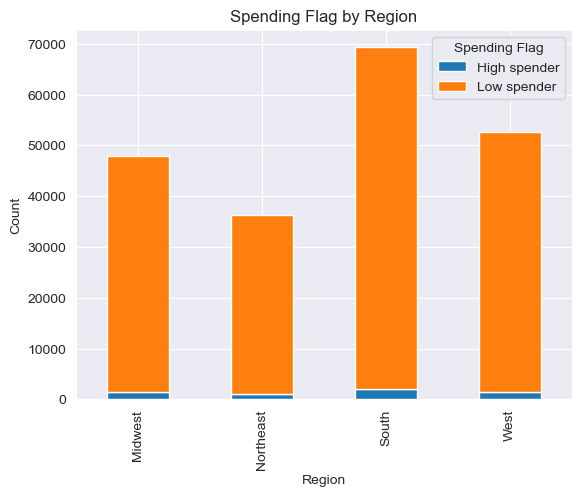

In [11]:
# Create a bar chart for Region and spending_flag
bar_region_spending_flag = cross_tab.plot(kind='bar', stacked=True)
plt.title("Spending Flag by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Spending Flag")

In [12]:
bar_region_spending_flag.figure.savefig(os.path.join(path, 'Visualizations', 'Ex_4.10_Charts', 'regional_spending.png'))

In [13]:
ords_prods_merge['marital_status'].value_counts()

marital_status
married                             21297377
single                               4985022
divorced/widowed                     2594326
living with parents and siblings     1452038
Name: count, dtype: int64

4.	The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [14]:
# Step 1: Calculate the number of orders for each user
user_order_counts = ords_prods_merge.groupby('user_id')['order_number'].count()

In [15]:
# Step 2: Create a flag for low-activity customers
ords_prods_merge['low_activity_flag'] = ords_prods_merge['user_id'].map(user_order_counts) < 5

In [16]:
# Exclude low-activity customers
ords_prods_merge_filtered = ords_prods_merge[ords_prods_merge['low_activity_flag'] == False]

In [17]:
ords_prods_merge_filtered.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Gender,State,Age,date_joined,number_of_dependants,marital_status,customer_income,_merge,Region,low_activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,False
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,False
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,False
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,False
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,False


In [18]:
ords_prods_merge_filtered['low_activity_flag'].value_counts()

low_activity_flag
False    30320103
Name: count, dtype: int64

In [19]:
ords_prods_merge_filtered.to_pickle(os.path.join(path, 'Prepared data', 'instacart_less_low_activity.pkl'))

5.	The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [20]:
# Define conditions for creating customer profiles
conditions = [
    (ords_prods_merge['Age'] <= 30) & (ords_prods_merge['customer_income'] >= 50000) & (ords_prods_merge['number_of_dependants'] == 0),
    (ords_prods_merge['Age'] >= 25) & (ords_prods_merge['Age'] <= 40) & (ords_prods_merge['number_of_dependants'] > 0),
    (ords_prods_merge['orders_day_of_week'].isin([5, 6])) & (ords_prods_merge['order_hour_of_day'] >= 18)
]


In [21]:
# Define the corresponding customer profile names
profile_names = ['Single Adult', 'Young Parent', 'Weekend Evening Shopper']

In [22]:
# Create the 'customer_profile' column based on conditions
ords_prods_merge['customer_profile'] = np.select(conditions, profile_names, default='Other')

In [23]:
# Display the first few rows with the customer profile
print(ords_prods_merge[['Age', 'customer_income', 'number_of_dependants', 'orders_day_of_week', 'order_hour_of_day', 'customer_profile']].head())

   Age  customer_income  number_of_dependants  orders_day_of_week  \
0   81            49620                     1                   6   
1   81            49620                     1                   6   
2   81            49620                     1                   5   
3   81            49620                     1                   6   
4   81            49620                     1                   5   

   order_hour_of_day customer_profile  
0                 11            Other  
1                 17            Other  
2                 14            Other  
3                 12            Other  
4                 14            Other  


6.	Create an appropriate visualization to show the distribution of profiles.

In [24]:
profile_counts = ords_prods_merge['customer_profile'].value_counts()
profile_counts.head()

customer_profile
Other                      22269033
Young Parent                5667053
Single Adult                1284255
Weekend Evening Shopper     1108422
Name: count, dtype: int64

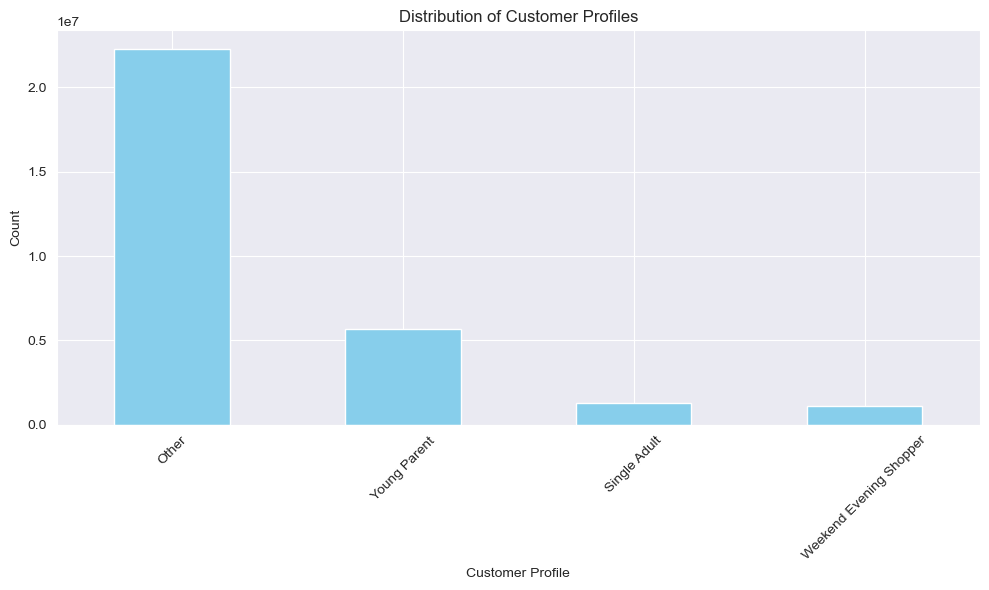

In [25]:
plt.figure(figsize=(10, 6))  # Set the figure size
profile_counts.plot(kind='bar', color='skyblue')  # Create a bar chart
plt.title('Distribution of Customer Profiles')  # Set the chart title
plt.xlabel('Customer Profile')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for a clean appearance

7.	Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [26]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,State,Age,date_joined,number_of_dependants,marital_status,customer_income,_merge,Region,low_activity_flag,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,False,Other
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,False,Other
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,False,Other
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,False,Other
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,False,Other


In [27]:
# Define the columns for aggregation
agg_columns = ['order_number', 'prices', 'orders_day_of_week', 'order_hour_of_day']

In [28]:
# Define the aggregation functions
agg_functions = {
    'order_number': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min'],
    'orders_day_of_week': ['max', 'mean', 'min'],
    'order_hour_of_day': ['max', 'mean', 'min']
}


In [29]:
# Group by "customer_profile" and calculate aggregations
agg_data = ords_prods_merge.groupby('customer_profile').agg(agg_functions)


In [30]:
# Reset the index to make "customer_profile" a column
agg_data.reset_index(inplace=True)

In [31]:
agg_data

customer_profile order_number                  prices             \
                                    max       mean min      max       mean   
0                    Other           99  18.300607   2  99999.0  11.847833   
1             Single Adult           99  18.111208   2  99999.0  13.471438   
2  Weekend Evening Shopper           99  17.335931   2  99999.0  11.892931   
3             Young Parent           99  18.246895   2  99999.0  12.163683   

       orders_day_of_week               order_hour_of_day                 
   min                max      mean min               max       mean min  
0  1.0                  6  2.606321   0                23  13.093281   0  
1  1.0                  6  2.716702   0                23  13.448631   0  
2  1.0                  6  5.515502   5                23  19.782696  18  
3  1.0                  6  2.732171   0                23  13.406975   0

8.	Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [32]:
# Group by "Region," "department_id," "product_name," and "customer_profile" and count occurrences
profile_department_region_product_counts = ords_prods_merge.groupby(['Region', 'department_id', 'product_name', 'customer_profile']).size().reset_index(name='count')

In [33]:
profile_department_region_product_counts

,Region,department_id,product_name,customer_profile,count
0,Midwest,1,1/4 Pound Burgers,Other,3
1,Midwest,1,100 Calorie Vanilla Ice Cream Bar,Other,3
2,Midwest,1,100 Calorie Vanilla Ice Cream Bar,Young Parent,2
3,Midwest,1,100 Calorie Variety Pack Ice Cream Bar,Other,4
4,Midwest,1,100% Apple Juice Concentrate,Other,7
...,...,...,...,...,...
489244,West,21,Zebra Cake,Other,2
489245,West,21,Zebra Popcorn,Other,7
489246,West,21,Zebra Popcorn,Young Parent,3
489247,West,21,Zero Lemon‑Lime Soda,Other,1


In [34]:
# Group by "Region" and "customer_profile" and count occurrences
grouped_counts = ords_prods_merge.groupby(['Region', 'customer_profile']).size().reset_index(name='count')

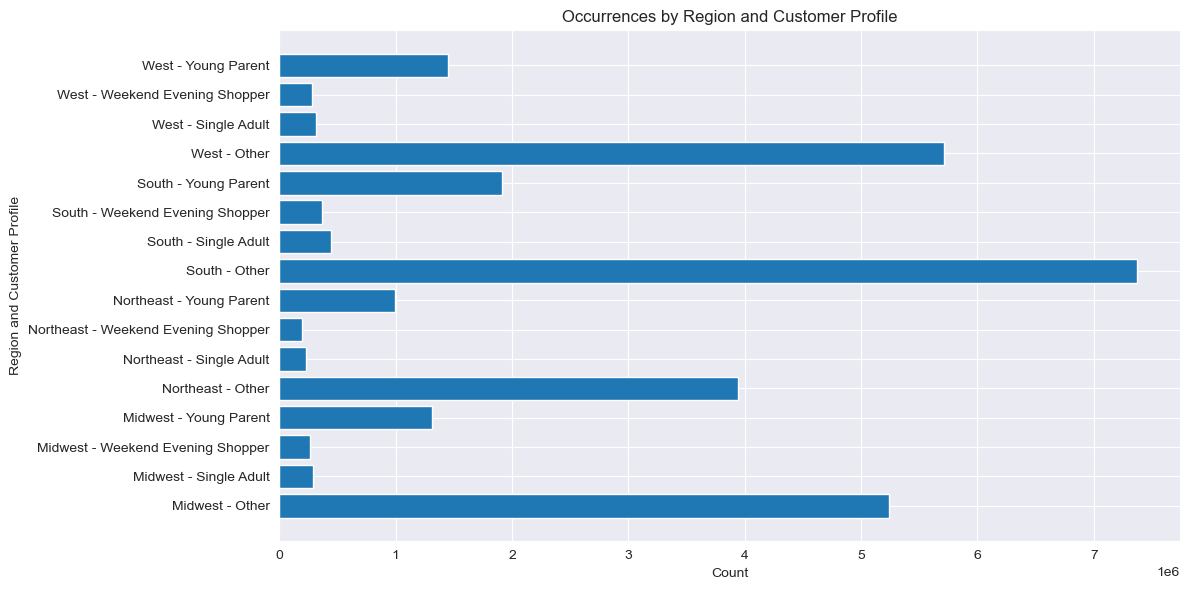

In [35]:
# Create a horizontal grouped bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(grouped_counts['Region'] + ' - ' + grouped_counts['customer_profile'], grouped_counts['count'])
plt.title('Occurrences by Region and Customer Profile')
plt.xlabel('Count')
plt.ylabel('Region and Customer Profile')
plt.tight_layout()

In [36]:
ords_prods_merge.to_pickle(os.path.join(path, 'Prepared data', 'instacart_final.pkl'))